In [39]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')

%matplotlib inline

In [40]:
train = pd.read_csv('data/train.csv')

### Exploratory Data Analysis
Data Exploration and Cleaning - Adesh

In [41]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Feature Breakdown:

- Categorical: Survived, Pclass, Sex, Embarked
- Numerical: Age, Fare, SibSp, Parch
- Mixed: Name, Ticket, Cabin

In [42]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


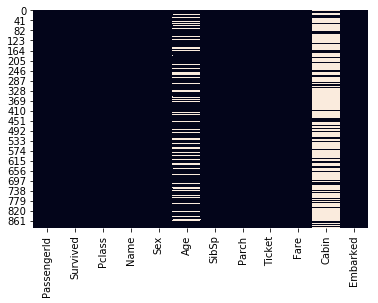

In [43]:
sns.heatmap(train.isnull(), cbar=False)

Assumptions:
- `passengerId` has no influence on the data -> drop
- `Cabin` is missing most of its values and therefore cannot be imputed -> drop
- `Ticket` is alphanumerical (difficult to work with) and 23% of values aren't unique -> drop?
- `Name` is a mixture of names and titles, seemingly doesn't affect survival -> drop?

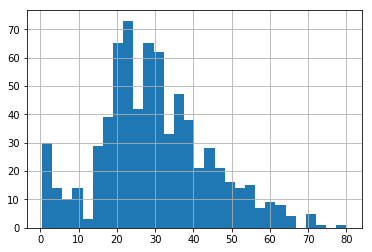

In [44]:
train['Age'].hist(bins=30)

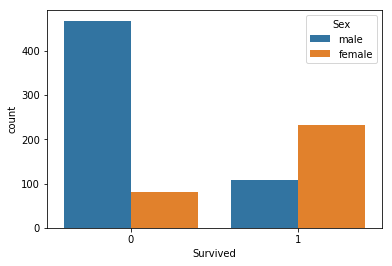

In [45]:
sns.countplot(x='Survived', data=train, hue='Sex')

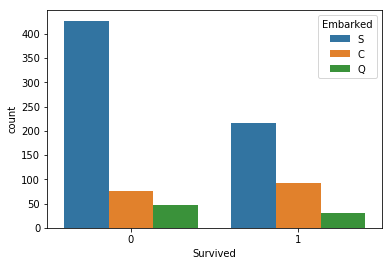

In [46]:
sns.countplot(x='Survived', data=train, hue='Embarked')

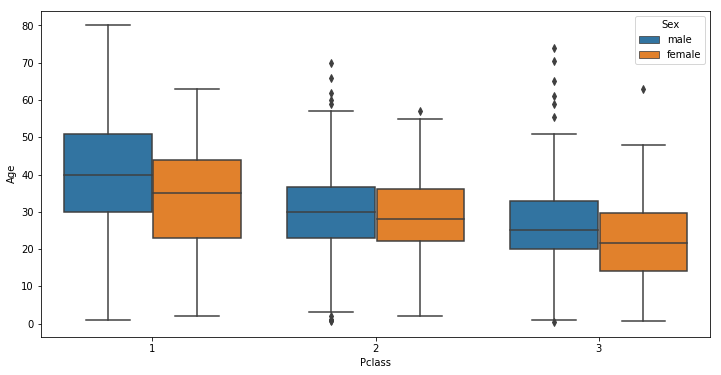

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=train)

In [48]:
medians = train.groupby(['Pclass','Sex'])['Age'].median().values
medians = [str(np.round(s, 2)) for s in medians]
medians

['35.0', '40.0', '28.0', '30.0', '21.5', '25.0']

 - `age_imputation` imputes the age of a passenger with the median value for their respective Pclass and Sex.
 - `gender` hot encodes male (1) / female (0).
 - `southampton` and `queenstown` hot encodes the port of embarking.

In [49]:
def age_imputation (cols):
    Age = cols[0]
    Sex = cols[1]
    Pclass = cols[2]
    
    if pd.isnull(Age):
        if Pclass == 1 and Sex == 'male':
            return 40
        elif Pclass == 1 and Sex == 'female':
            return 35
        elif Pclass == 2 and Sex == 'male':
            return 30
        elif Pclass == 2 and Sex == 'female':
            return 28
        elif Pclass == 3 and Sex == 'male':
            return 25
        elif Pclass == 3 and Sex == 'female':
            return 22
    else:
        return Age

In [50]:
def gender (val):
    if val == 'male':
        return 1
    else:
        return 0

In [51]:
def southampton (col):
    Embarked = col
    
    if Embarked == 'S':
        return 1
    else:
        return 0

def queenstown (col):
    Embarked = col
    
    if Embarked == 'Q':
        return 1
    else:
        return 0

In [52]:
def title_cat (x):
    if x == 'Mr':
        return 1
    elif x == 'Miss' or x == 'Mrs' or x == 'Ms' or x == 'Mme' or x == 'Lady' or x == 'Mlle':
        return 2
    else:
        return 3

In [53]:
train['Age'] = train[['Age','Sex','Pclass']].apply(age_imputation,axis=1)

In [54]:
train['Sex'] = train['Sex'].apply(lambda x: gender(x))

In [55]:
train['S'] = train['Embarked'].apply(lambda x: southampton(x))
train['Q'] = train['Embarked'].apply(lambda x: queenstown(x))

In [56]:
train['Title'] = train['Name'].apply(lambda x: x.split(', ')[1].split('.')[0].strip())
train['Title'] = train['Title'].apply(lambda x: title_cat(x))

In [57]:
train.drop(['Cabin', 'PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [58]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,S,Q,Title
0,0,3,1,22.0,1,0,7.2500,1,0,1
1,1,1,0,38.0,1,0,71.2833,0,0,2
2,1,3,0,26.0,0,0,7.9250,1,0,2
3,1,1,0,35.0,1,0,53.1000,1,0,2
4,0,3,1,35.0,0,0,8.0500,1,0,1
5,0,3,1,25.0,0,0,8.4583,0,1,1
6,0,1,1,54.0,0,0,51.8625,1,0,1
7,0,3,1,2.0,3,1,21.0750,1,0,3
8,1,3,0,27.0,0,2,11.1333,1,0,2
9,1,2,0,14.0,1,0,30.0708,0,0,2


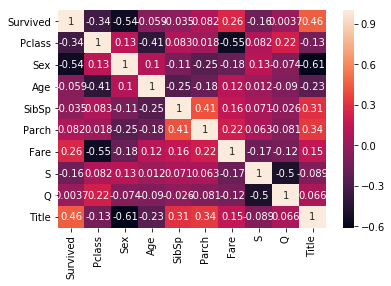

In [59]:
sns.heatmap(train.corr(), annot= True)

In [77]:
train.to_csv('data/train_clean.csv')

### Machine Learning Models

1. Logistic Regression - Tiago
2. Random Forest Classification - Sadiyah
3. Support Vector Machine - Raman
4. Neural Network - Adesh
___

**Neural Network using Keras - Adesh**

Splitting data into `X_train` and `y_train`, scaling the data, and using Keras for Neural Network.

In [60]:
X_train = train.iloc[:, 1:10]
y_train = train.iloc[:, 0]

In [61]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [62]:
from keras import Sequential
from keras.layers import Dense

In [63]:
classifier = Sequential()

# Creating Hidden layers
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=9))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))

# Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [64]:
# Compiling the Neural Network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [65]:
# Fitting the data to the training dataset
classifier.fit(X_train, y_train, batch_size=128, epochs=256)

Epoch 1/256
891/891 [==============================] - 0s 450us/step - loss: 0.6928 - acc: 0.5903
Epoch 2/256
891/891 [==============================] - 0s 11us/step - loss: 0.6920 - acc: 0.6162
Epoch 3/256
891/891 [==============================] - 0s 9us/step - loss: 0.6912 - acc: 0.6162
Epoch 4/256
891/891 [==============================] - 0s 12us/step - loss: 0.6904 - acc: 0.6162
Epoch 5/256
891/891 [==============================] - 0s 14us/step - loss: 0.6896 - acc: 0.6162
Epoch 6/256
891/891 [==============================] - 0s 10us/step - loss: 0.6888 - acc: 0.6162
Epoch 7/256
891/891 [==============================] - 0s 11us/step - loss: 0.6880 - acc: 0.6162
Epoch 8/256
891/891 [==============================] - 0s 10us/step - loss: 0.6871 - acc: 0.6162
Epoch 9/256
891/891 [==============================] - 0s 9us/step - loss: 0.6862 - acc: 0.6162
Epoch 10/256
891/891 [==============================] - 0s 10us/step - loss: 0.6852 - acc: 0.6162
Epoch 11/256
891/891 [========

In [66]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

891/891 [==============================] - 0s 72us/step


[0.4038624813326548, 0.8316498311815572]

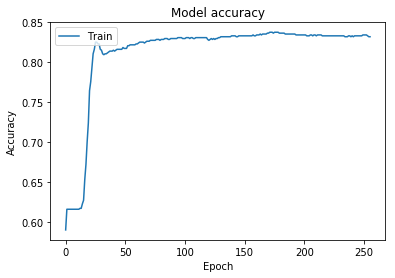

In [67]:
plt.plot(classifier.history.history['acc'])
#plt.plot(classifier.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Importing testing set and making it look like the training set.

In [68]:
X_test = pd.read_csv('data/test.csv')
X_test['Age'] = X_test[['Age','Sex','Pclass']].apply(age_imputation,axis=1)
X_test['Sex'] = X_test['Sex'].apply(lambda x: gender(x))
X_test['S'] = X_test['Embarked'].apply(lambda x: southampton(x))
X_test['Q'] = X_test['Embarked'].apply(lambda x: queenstown(x))
X_test['Title'] = X_test['Name'].apply(lambda x: x.split(', ')[1].split('.')[0].strip())
X_test['Title'] = X_test['Title'].apply(lambda x: title_cat(x))
X_test.drop(['Cabin', 'PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [69]:
sc_test = StandardScaler()
X_test = sc_test.fit_transform(X_test)
X_test

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.87348191,  0.75592895,  0.39578146, ..., -1.35067551,
         2.84375747, -0.79653256],
       [ 0.87348191, -1.32287566,  1.36279485, ...,  0.74037028,
        -0.35164743,  0.82761676],
       [-0.31581919,  0.75592895,  2.52321092, ..., -1.35067551,
         2.84375747, -0.79653256],
       ...,
       [ 0.87348191,  0.75592895,  0.70522575, ...,  0.74037028,
        -0.35164743, -0.79653256],
       [ 0.87348191,  0.75592895, -0.33914872, ...,  0.74037028,
        -0.35164743, -0.79653256],
       [ 0.87348191,  0.75592895, -0.33914872, ..., -1.35067551,
        -0.35164743,  2.45176608]])

In [70]:
y_test = pd.read_csv('data/gender_submission.csv')
y_test.drop(['PassengerId'],axis=1,inplace=True)

Using model to predict values.

In [71]:
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


Confusion matrix and ROC curve for model accuracy.

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

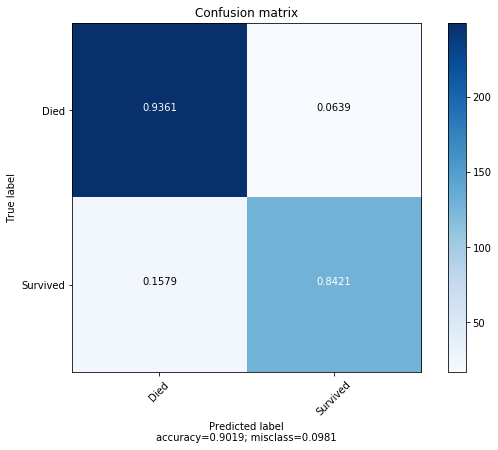

In [73]:
from plotting import plot_confusion_matrix
plot_confusion_matrix(cm, ['Died', 'Survived'])

In [74]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

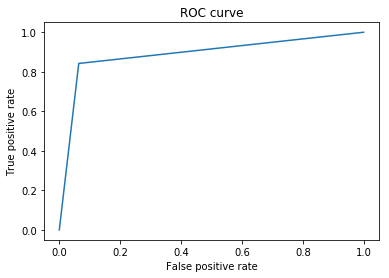

In [75]:
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [76]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.8890977443609022

___